In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pickle

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
ohe=OneHotEncoder()

In [15]:
geo_encoder=ohe.fit_transform(data[['Geography']])

In [17]:
geo_encoder.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [20]:
ohe.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [22]:
geo_df=pd.DataFrame(geo_encoder.toarray(),columns=ohe.get_feature_names_out(['Geography']))

In [25]:
data_final=pd.concat([data,geo_df],axis=1)

In [59]:
data_final=data_final.drop(['Geography'],axis=1)

In [40]:
label_encoder=LabelEncoder()
data_final['Gender']=label_encoder.fit_transform(data_final['Gender'])

In [60]:
data_final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [61]:
with open('label_encoder.pkl','wb') as file:
    pickle.dump(label_encoder,file)

with open('ohe.pkl','wb') as file:
    pickle.dump(ohe,file)

In [78]:
X=data_final.drop(['EstimatedSalary'],axis=1)
Y=data_final['EstimatedSalary'].values.reshape(-1, 1)

In [79]:
Y

array([[101348.88],
       [112542.58],
       [113931.57],
       ...,
       [ 42085.58],
       [ 92888.52],
       [ 38190.78]])

In [63]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,1,0.0,1.0,0.0


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [84]:
scaler_x=StandardScaler()
scaler_Y = StandardScaler()
X_train=scaler_x.fit_transform(X_train)
X_test=scaler_x.transform(X_test)
Y_train = scaler_Y.fit_transform(Y_train.to_numpy().reshape(-1, 1))
Y_test = scaler_Y.transform(Y_test.to_numpy().reshape(-1, 1))

In [70]:
import tensorflow as tf



In [71]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [85]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(Y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(Y_test)

In [86]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [87]:
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

model = RegressionModel(X_train.shape[1])

In [88]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    for xb, yb in train_loader:
        # Forward
        preds = model(xb)
        loss = criterion(preds, yb)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 10/100, Loss: 1.0247
Epoch 20/100, Loss: 0.8743
Epoch 30/100, Loss: 1.2382
Epoch 40/100, Loss: 0.8337
Epoch 50/100, Loss: 0.9871
Epoch 60/100, Loss: 0.8810
Epoch 70/100, Loss: 0.7697
Epoch 80/100, Loss: 0.6692
Epoch 90/100, Loss: 0.6973
Epoch 100/100, Loss: 0.5898


In [93]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = scaler_Y.inverse_transform(y_pred.numpy())
    y_true = scaler_Y.inverse_transform(Y_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_true, y_pred))
print("R² Score:", r2_score(y_true, y_pred))

MSE: 4138811964.924443
R² Score: -0.2537093099964216


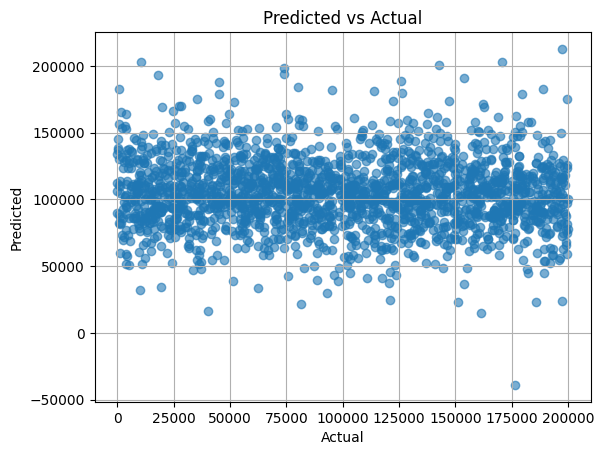

In [94]:
import matplotlib.pyplot as plt

plt.scatter(y_true, y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.grid()
plt.show()

In [ ]:
l